In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
boston = pd.read_csv("Boston.csv") 
boston.head() 

C:\Users\panka\AppData\Local\Temp\ipykernel_21344\3070844966.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
boston.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [3]:
boston = boston.drop(columns="Unnamed: 0") 
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:

boston_x = pd.DataFrame(boston.iloc[:,:13]) 
boston_x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:

boston_y = pd.DataFrame(boston.iloc[:,-1]) 
boston_y.head() 

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(boston_x, boston_y, test_size=0.3) 
print("xtrain shape", X_train.shape) 
print("ytrain shape", Y_train.shape)

xtrain shape (354, 13)
ytrain shape (354, 1)


In [8]:

print("xtest shape", X_test.shape) 
print("ytest shape", Y_test.shape) 

xtest shape (152, 13)
ytest shape (152, 1)


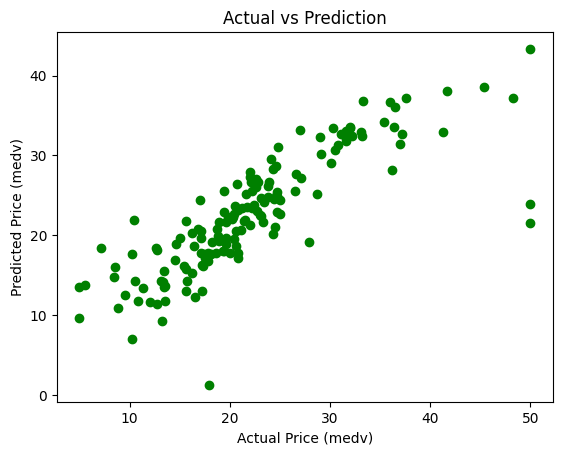

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

# Load the dataset
boston = pd.read_csv("Boston.csv") 

# Drop the 'Unnamed: 0' column
boston = boston.drop(columns="Unnamed: 0") 

# Create feature (X) and target (Y) datasets
boston_x = pd.DataFrame(boston.iloc[:,:13]) 
boston_y = pd.DataFrame(boston.iloc[:,-1]) 

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(boston_x, boston_y, test_size=0.3) 

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, Y_train)

# Make predictions on the testing set
Y_pred_linear = model.predict(X_test)

# Plot Actual vs Prediction
plt.scatter(Y_test, Y_pred_linear, c="green") 
plt.xlabel("Actual Price (medv)") 
plt.ylabel("Predicted Price (medv)") 
plt.title("Actual vs Prediction") 
plt.show()
